In [2]:
import pandas as pd
import hashlib as hl
import matplotlib.pyplot as plt


NOC = pd.read_csv('noc_regions.csv')
athlete_events = pd.read_csv('athlete_events.csv')
olympic_df = athlete_events.merge(NOC, on="NOC", how="inner")


olympic_df = olympic_df.copy()
olympic_df["Name"] = olympic_df["Name"].apply(lambda name: hl.sha256(name.encode()).hexdigest()).str[:6]


#0.a
amount_of_countries = olympic_df["region"].nunique()
amount_of_countries

#print(f"Antal länder i datasetet: {unique_region}")

#0.b
what_countries = olympic_df["region"].unique()
what_countries

#print(f"Länder i datasetet: {unique_region}")


#0.c
what_sports = olympic_df["Sport"].unique()
what_sports

#0.d
what_medals = olympic_df["Medal"].unique()
what_medals

#0.e
olympic_df.describe()



,ID,Age,Height,Weight,Year
count,270767.000000,261305.000000,210684.000000,207982.000000,270767.000000
mean,68229.276832,25.559783,175.344250,70.709523,1978.362297
std,39017.998824,6.392501,10.519556,14.350094,29.884637
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34630.500000,21.000000,168.000000,60.000000,1960.000000
50%,68187.000000,24.000000,175.000000,70.000000,1988.000000
75%,102065.500000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


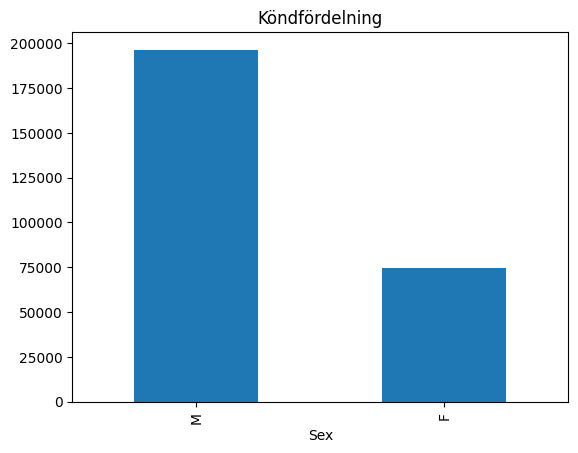

In [3]:
#0.f

gender_dist = olympic_df["Sex"].value_counts()
gender_dist


gender_dist.plot(kind='bar', title="Köndfördelning")
plt.show()


In [4]:
import plotly_express as px

by_women = olympic_df.groupby("Sex").get_group("F")

women_by_year = by_women.sort_values(["Year"]).groupby(["Year", "Season"], as_index=False)
women_by_year = women_by_year["Name"].count()


fig = px.bar(women_by_year, x="Year", y="Name", color="Season")
fig.show()


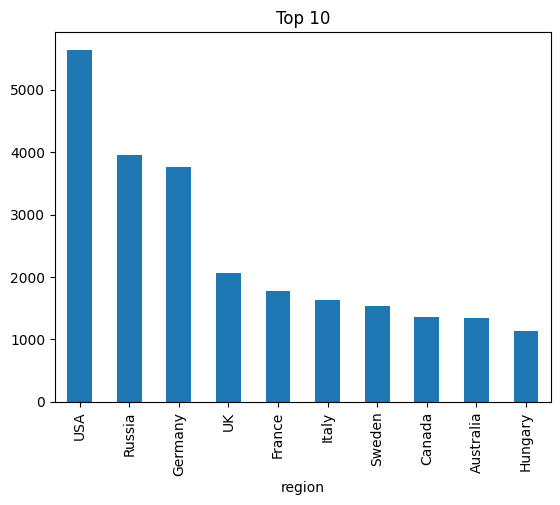

In [5]:
amount_medals = olympic_df.groupby("region")["Medal"].count()
top_10 = amount_medals.sort_values(ascending=False).head(10)


top_10.plot(kind="bar", title="Top 10")

plt.show()

In [42]:
canada_gold = olympic_df.query("region=='Canada' & Medal =='Gold'")
events_by_year = canada_gold[["Event", "Year", "Sport", "Medal"]].groupby(["Event"], as_index=False).value_counts().sort_values(by=["Event", "Year"], ascending=[False, True])


title_defences = events_by_year[events_by_year['Event'].duplicated(keep=False)]
title_defences.loc[:,'difference'] = title_defences.groupby("Event", as_index=False)['Year'].diff()
title_defences.drop(title_defences[(title_defences['difference'] != 4)].index, inplace=True)
title_defences.drop(['count', "difference"], axis=1, inplace=True)
title_defences = title_defences.value_counts().reset_index().sort_values(by=["Event", "Year"], ascending=[True, True])


fig5 = px.bar(title_defences, x="Event", y="count", color="Year", labels=dict(count="Titelförsvar"), hover_data=dict(count=False, Event=True, Sport=False), title="År med guldmedaljer i följd")
fig5.update_layout(xaxis={'categoryorder':'total ascending'})

fig5.show()


C:\Users\Alejandro Martinez\AppData\Local\Temp\ipykernel_5564\2105559925.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alejandro Martinez\AppData\Local\Temp\ipykernel_5564\2105559925.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alejandro Martinez\AppData\Local\Temp\ipykernel_5564\2105559925.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
medals = ["Gold", "Silver", "Bronze"]
judo_medalists = olympic_df.query("Sport == 'Judo' & Medal == @medals")

medals_by_region = judo_medalists["region"].value_counts()
top_10_countries = medals_by_region.head(10).index
top_country_athletes = judo_medalists[judo_medalists["region"].isin(top_10_countries)]

canada_judo_medalists = judo_medalists.query("region == 'Canada'")
canada_medals = canada_judo_medalists.groupby("region")["Medal"].count()

athletes_top_11 = pd.concat([top_country_athletes, canada_judo_medalists])
top_11_region_medal_count = athletes_top_11.groupby(["region", "Medal"], as_index=False).count().sort_values(by=['region', "ID"], ascending=False)


fig1 = px.bar(top_11_region_medal_count, x="region", y="ID",
            color="Medal", color_discrete_map={ "Gold": '#edc240', "Silver":'#949085', "Bronze":'#85723c'}, 
            template="plotly_dark", title="Top 10 judonationer")
fig1.update_layout(
                xaxis={'categoryorder':'total descending'}, 
                title="Top 10 judonationer",
                xaxis_title="Land",
                yaxis_title="Antal Medaljer",
                legend_title="Medaljer")

fig1.show()



In [8]:
top_10_judoka_names = top_country_athletes.groupby("Name")["Medal"].count().sort_values(ascending=False).head(10).index
top_10_judokas = judo_medalists[judo_medalists["Name"].isin(top_10_judoka_names)]

top_canadian_judoka_name = judo_medalists.query("region == 'Canada'").groupby("Name")["Medal"].count().sort_values(ascending=False).head(1).index
top_canadian_judoka = judo_medalists[judo_medalists["Name"].isin(top_canadian_judoka_name)]

top_11_judokas = pd.concat([top_10_judokas, top_canadian_judoka])


by_region_and_name = top_11_judokas.groupby(["region", "Sex", "Medal"])["Name"].value_counts().reset_index()
# top_11_by_country = by_region_and_name.sort_values(ascending=False).reset_index()

# top_11_by_country = top_11_by_country.drop(top_11_by_country.index[-1])
# top_11_by_country.iloc[4, -1] = 4 #Angelo Parisi, switch from uk to france

#Antal medaljer efter land
# fig2 = px.bar(top_11_by_country, 
#               x="region", y="count", 
#               barmode="group", color="Name", 
#               title="Framgångsrikaste Judokas", 
#               labels=dict(count="Medaljer", region="Land", Name="Namn"), 
#               hover_data=dict(Sex=True), template="plotly_dark")

# fig2.show()

by_region_and_name

,region,Sex,Medal,Name,count
0,Canada,M,Bronze,bc61fe,1
1,Canada,M,Silver,bc61fe,1
2,Cuba,F,Bronze,6a0b99,3
3,Cuba,F,Bronze,eec409,2
4,Cuba,F,Bronze,49af03,1
5,Cuba,F,Gold,eec409,1
6,Cuba,F,Gold,49af03,1
7,Cuba,F,Silver,eec409,1
8,Cuba,F,Silver,49af03,1
9,France,M,Bronze,7a4dc2,1


In [9]:

fig = px.bar(by_region_and_name, 
              x="Name", y="count", 
              color="Medal",
              title="Framgångsrikaste Judokas", 
              labels=dict(count="Medaljer", region="Land", Name="Namn"), 
              hover_data=dict(Sex=True, region=True), template="simple_white",
              color_discrete_map={ "Gold": '#edc240', "Silver":'#949085', "Bronze":'#85723c'})

fig.update_layout(
                legend_traceorder='reversed',
                xaxis={'categoryorder':'total descending'})

fig.show()




In [10]:
# mens_gold = judo_medalists.query("Sex == 'M'")
# top_gold_m_names = mens_gold.groupby("Medal").get_group("Gold").groupby("Name")["Medal"].count().sort_values(ascending=False).head(8).index
# womens_gold = judo_medalists.query("Sex == 'F'")
# top_gold_f_names = womens_gold.groupby("Medal").get_group("Gold").groupby("Name")["Medal"].count().sort_values(ascending=False).head(5).index

# top_indexes = top_gold_m_names.union(top_gold_f_names)
# top_gold_medalists_profile = judo_medalists[judo_medalists["Name"].isin(top_indexes)]


# top_13 = top_gold_medalists_profile.sort_values(by=["Name", "Year"], ascending=True).groupby("Medal").get_group("Gold")
# top_13_unique_years = top_13.drop_duplicates(subset=['Name', 'Year'])
# top_13_unique_years_copy = top_13_unique_years.copy()
# top_13_unique_years_copy.loc[:,'difference'] = top_13_unique_years_copy.groupby("Name")['Year'].diff()
# title_defences = top_13_unique_years_copy.groupby(["Name", "region", "Sex"])["Medal"].value_counts()-1

# title_defences = title_defences.reset_index()

# fig3 = px.bar(title_defences, x="Name", y="count", 
#             barmode="group", color="region", 
#             title="Framgångsrika titelförsvar", 
#             labels=dict(count="Antal", Name="Namn", region="Land"), 
#             template="plotly_dark")

# fig3.update_traces(width=0.75)

# fig3.show()



In [11]:
gold_judokas = judo_medalists.query("Medal == 'Gold'")[["Name", "region", "Sex", "Year", "Medal"]]

gold_years = gold_judokas.drop_duplicates(subset=['Name', 'Year']).sort_values(by=["Name","Year"])
gold_years.loc[:,'difference'] = gold_years.groupby("Name")['Year'].diff()
title_defences = gold_years.groupby(["Name", "region", "Sex"])["Medal"].value_counts()-1

title_defences = title_defences.sort_values(ascending=False).reset_index(name="count").head(12)


fig3 = px.bar(title_defences, x="Name", y="count", 
            barmode="group", color="region", 
            title="Framgångsrika titelförsvar", 
            labels=dict(count="Antal", Name="Namn", region="Land"), 
            template="plotly_dark")

fig3.update_traces(width=0.75)
fig3.show()

#nederländsk dubbelguld???


In [12]:
def insert_new_row(group, new_row_data): #Chat GPT 
    new_row_data['region'] = group['region'].iloc[0]
    new_row = pd.DataFrame([new_row_data])
    return pd.concat([group, new_row])


medals_per_year = judo_medalists.groupby(["region", "Year"],as_index=False)["Medal"].count().sort_values(by="Year")
medals_per_year['cumulative_sum'] = medals_per_year.groupby(['region'])['Medal'].cumsum()


new_row_data = [{'region': 'None', 'Year': år} for år in [1964, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]]
for row_data in new_row_data:
    medals_per_year = medals_per_year.groupby('region', group_keys=False).apply(lambda group: insert_new_row(group, row_data))


medals_per_year = medals_per_year.drop_duplicates(subset=["region",'Year'], keep='first')
medals_per_year = medals_per_year[medals_per_year.columns].sort_values(by="Year", ascending=True).groupby('region')[medals_per_year.columns].ffill().fillna(0)



fig = px.bar(medals_per_year,
           x="region", y="cumulative_sum",
           range_y=[0,90],
           animation_frame="Year", animation_group="region",
           color="region",
           hover_name="region",
           hover_data=dict(region=False),
           )

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1750

fig.show()



In [13]:
from dash import Dash, html, dcc, callback, Output, Input
import dash_bootstrap_components as dbc
import plotly_express as px
import pandas as pd

olympic_df


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,3a4eef,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,a6430c,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,1b3608,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,f941f6,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,b83a05,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270762,120575,36531c,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270763,120575,36531c,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270764,122166,c0e689,F,15.0,NaN,NaN,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
270765,122215,0a1bed,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


In [14]:
def top_judo_nations():

    fig = px.bar(top_11_region_medal_count, x="region", y="ID",
                    color="Medal", 
                    color_discrete_map={ "Gold": '#edc240', "Silver":'#949085', "Bronze":'#85723c'}, #Stackoverflow
                    template="simple_white", 
                    title="Top 10 judonationer (+ Kanada)",
                    labels=dict(ID="Antal medaljer", region="Land")
                )

    fig.update_layout(xaxis={'categoryorder':'total descending'}, #Stack overflow
                    legend_title="Medaljer",
                    legend_traceorder='reversed'
                    )

    medaljer = {"Gold":"Guld", "Silver":"Silver", "Bronze": "Brons"} #Stackoverflow
    fig.for_each_trace(lambda t: t.update(name = medaljer[t.name])) #https://stackoverflow.com/questions/61750215/plotly-how-to-change-legend-item-names

    return fig

def top_judokas():
    fig = px.bar(by_region_and_name, 
                x="Name", y="count", 
                color="Medal",
                title="Framgångsrikaste Judokas", 
                labels=dict(count="Medaljer", region="Land", Name="Namn"), 
                hover_data=dict(Sex=True, region=True), template="simple_white",
                color_discrete_map={ "Gold": '#edc240', "Silver":'#949085', "Bronze":'#85723c'})

    fig.update_layout(
                    legend_traceorder='reversed',
                    xaxis={'categoryorder':'total descending'})
    
    fig.update_xaxes(tickangle=45) #https://stackoverflow.com/questions/68400851/how-to-rotate-xtick-label-bar-chart-plotly-express

    return fig

def top_defenders():
    
    fig = px.bar(title_defences, 
        x="Name", y="count", 
        barmode="group", color="region", 
        labels=dict(count="Antal titelförsvar", Name="Namn", region="Land"), 
        hover_data=dict(Name=False),
        template="simple_white")
    fig.update_traces(width=0.75)


    fig.update_xaxes(tickangle=45) #https://stackoverflow.com/questions/68400851/how-to-rotate-xtick-label-bar-chart-plotly-express


    return fig


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
app = Dash(
    __name__, 
    external_stylesheets=[dbc.themes.FLATLY],
    meta_tags=[{"name":"viewport", "content":"width=device-width, initial-scale=1"}]
    )


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
app.layout = dbc.Container([

    dbc.Row([ #row 1

        dbc.Col([ #column 1.1

            html.H1("Judo", id='judo_dashboard_intro', className='text-center text-primary mt-3'),
            dcc.Graph(id="top_11_chart", figure = top_judo_nations())

                ], width=12)
            ]),

# # # # # # # # # # # # # # # # # # # # # # # # 
    dbc.Row([ #row 2
        html.H4("Top judokas & titelförsvarare", id='judokas_and_title_defence', className='text-center text-primary mt-3'),

        dbc.Col([ #column 2.1

            dcc.Graph(
                id='judokas_chart',
                figure = top_judokas())

        ], width=6),
    
# # # # # # # # # # # asd

        dbc.Col([ #column 2.2

            dcc.Graph(
                id='title_defences_chart',
                figure = top_defenders())

        ], width=6)

    ]),

# # # # # # # # # # # # # # # # # # # # # # # # 
    dbc.Row([ #row 3
        dbc.Col([ #column 3.1

            html.H4("Medaljer genom historien", id='historical_chart_header', className='text-center text-primary mt-3'),
            dcc.Dropdown(id='multi_dropdown_historical_chart', multi=True, className='mb-2',
                options=[country for country in medals_per_year["region"].unique()],
                style={'color': '#333'}
            ),

            dcc.Graph(id='historical_chart',
                figure={})

                ], width=12)
            ],justify="evenly"),

])


@callback(
    Output('historical_chart', 'figure'),
    Input('multi_dropdown_historical_chart', 'value')
)
def update_historical_chart(regions):
    if regions is None: regions = [] 
    df = medals_per_year[medals_per_year["region"].isin(regions)]

    fig = px.bar(df,
            x="region", y="cumulative_sum",
            range_y=[0,90],
            animation_frame="Year", animation_group="region",
            color="region",
            hover_name="region",
            hover_data=dict(region=False, Year=False, Medal=True),
            labels=dict(cumulative_sum="Totalt antal medaljer", region="Land")
            )

    fig.update_layout(xaxis={'categoryorder':'total descending'}) #Stack overflow
    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500 #Stackoverflow

    return fig




if (__name__) == "__main__":
    app.run(debug=True, jupyter_mode='external')





OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.